<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 1</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h4 align="center">Alumno ; Rol ; Malla</h4>
    <h4 align="center">Alumno ; Rol ; Malla</h4>
    <h4 align="center">Marzo 2019</h4>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## Instrucciones


La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual. Este laboratorio debe ser entregado el día 5 de abril.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab1.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas + un README que indique la forma correcta de ejecutar su notebook. Este notebook presenta ciertas preguntas marcadas con **O:** que indican que para los alumnos de malla nueva es opcional, pero obligatoria para los alumnos de malla vieja. En el caso de haber una pareja con un integrante de malla nueva y uno de malla vieja, se considera malla vieja. El laboratorio puede ser trabajado tanto en lenguaje R como en lenguaje python (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará reprobación del laboratorio con nota 0 (lo que implica reprobar el ramo con nota 0) además de la notificación correspondiente al Profesor.** 

**Puntos bonus para todos:** Debido a que a veces hay preguntas que les piden una conclusión utilizando ciertos elementos, si lo desea, puede agregar elementos extra para hacer una mejor conclusión o concluir algo más que tenga sentido con lo anterior; estos gráficos pueden otorgar puntos bonus dependiendo de su calidad y del comentario que lo acompañe (con un máximo de 3 puntos bonus por pregunta, no acumulables si alcanza la nota máxima)

## 1. Sarcasmo en Reddit (30p)

Reddit es una página web muy conocida que, en simples palabras, es una compilación de muchos foros llamados "subreddits", en esta sección trabajará con un dataset que contiene una compilación de comentarios realizados por usuarios en distintos subreddits, los que vienen con una indicación de si el comentario es sarcástico o no.
[Fuente](https://www.kaggle.com/sherinclaudia/sarcastic-comments-on-reddit)

>a) **O:** Cargue los datos y resuma brevemente que contiene el dataset 

>b) ¿Existe algún subreddit donde los comentarios no sarcásticos predominen? ¿Y alguno donde predominen los comentarios sarcásticos? 


>c) Realice un top 10 con los subreddits que más se repiten en la etiqueta sin sarcasmo y un top 10 de los que más se repiten en la etiqueta con sarcasmo. ¿Existen similitudes/diferencias en ambas listas? ¿A qué se puede deber esto?

>d) Construya una línea de tiempo (use la columna que estime más conveniente como eje de tiempo) y coloree los datos según su etiqueta de sarcasmo, comente lo que observa.

*Consejo: puede agrupar comentarios y contar el total que se registra en ese momento del tiempo en vez de graficar cada comentario en la línea.*

>e) Haga un histograma y boxplot de los puntajes de comentarios sarcásticos y no sarcásticos, comparelos y concluya a partir de lo que observa, puede agregar otro tipo de gráficos si desea para apoyar su conclusión.

## 2. Simulaciones 

Una de las gracias de tener una máquina con alta capacidad de cómputo es el poder realizar simulaciones. Las simulaciones nos permiten recrear experimentos que requieren una gran cantidad de datos, por ejemplo, lanzar un dado 10000 veces y determinar las probabilidades de cada resultado posible.


### 2.1 Lanzamiento de Agujas (30p)

Imagine que tiene un puñado de agujas ($n$ agujas) y las lanza al aire, estas agujas caen aleatoriamente dentro de un espacio de 20x20 unidades (asuma que la aguja puede quedar con una parte afuera y otra adentro si cae en alguno de los bordes/cerca de un borde de este espacio), este espacio tiene líneas horizontales cada 1 unidad en el eje Y, obviando los bordes inferior y superior de este espacio, usted está interesado en determinar la probabilidad de que una aguja atraviese cualquiera de estas líneas horizontales, para ello ha decidido simular este experimento utilizando el centroide de la aguja (posición donde cae) y el ángulo medido respecto a la horizontal que atraviesa el centroide $\alpha$ (ver imagen)

<img src="img/aguja.png" style="float:center;height:100px">

El largo de la aguja es el mismo que la separación entre las lineas horizontales (1 unidad)


Calcule la probabilidad utilizando $n =10,100,1000,10000,100000$ agujas

Puntos bonus por :
* (5) Probar con tamaños distintos del espacio y concluir comparando con los otros casos
* (5) Añadir 1 gráfico por cada $n$ donde se vea el espacio y las agujas después de caer, recuerde hacer un comentario respecto al gráfico, no solo incluirlo.

En el experimento al lanzar cada aguja tenemos dos variables importantes, el ángulo ($\theta$) de la aguja y donde se encuentra el centro de la aguja ($x$).
<img src="img/dibujo_buffon.png" style="float:center;height:100px"><br>
Además debemos considerar las condiciones del largo del intervalo en el cual vive la división de las lineas el cual es el mismo que el largo de la aguja.
Ahora bien, debemos tomar las probabilidades de nuestra aguja tanto su posición $x$ como su ángulo $\theta$.

Para nuestra posición en x es simple, es equivalente a nuestro centro de masa el cual se calcula de la siguiente forma:

$$ P_x = \frac{1}{l} \Leftrightarrow P_x = 1 $$

De forma similar podemos obtener la probabilidad de nuestro ángulo, usando una distribución uniforme continua, entre $0$ y $\pi$, con lo cual obtenemos:

$$ P_\theta = \frac{1}{\pi - 0} \Leftrightarrow P_\theta = \frac{1}{\pi}$$

Con toda esta información nos basta delimitar cuando obtenemos una colisión con algunas de las líneas horizontales, esto sucede bajo la siguiente condición:

$$ x \lt \frac{l \cdot \sin\theta}{2} \Leftrightarrow x \lt \frac{\sin\theta}{2}$$

In [57]:
agujas <- function(n){
    x.pos <- runif(n,0,20)
    y.pos <- runif(n,0,20)
    rotacion <- runif(n,0,pi)
    x.max <- x.pos + (0.5*cos(rotacion))
    x.min <- x.pos - (0.5*cos(rotacion))
    y.max <- y.pos + (0.5*sin(rotacion))
    y.min <- y.pos - (0.5*sin(rotacion))
    plot(x=x.pos, y=y.pos, xlim=c(0,20), ylim=c(0,20),col='white')
    for (i in seq (0,19,by=1)){
        lines (x=c(0,20), y=c(i,i))
    }
    for (i in 1:n){
        lines (x=c(x.min[i], x.max[i]), y=c(y.min[i], y.max[i]))
    }
    cruces <- 0
    for (i in seq (0,19,by=1)){
        intervalo <- sum(y.min < i & y.max > i)
        cruces = cruces + intervalo
    }
    probabilidad <- (cruces/n)
    string1 <- "Muestra de"
    string2 <- "agujas con una probabilidad:"
    resultado <- print(paste(string1,n,string2,probabilidad))    
}

[1] "Muestra de 10 agujas con una probabilidad: 0.8"


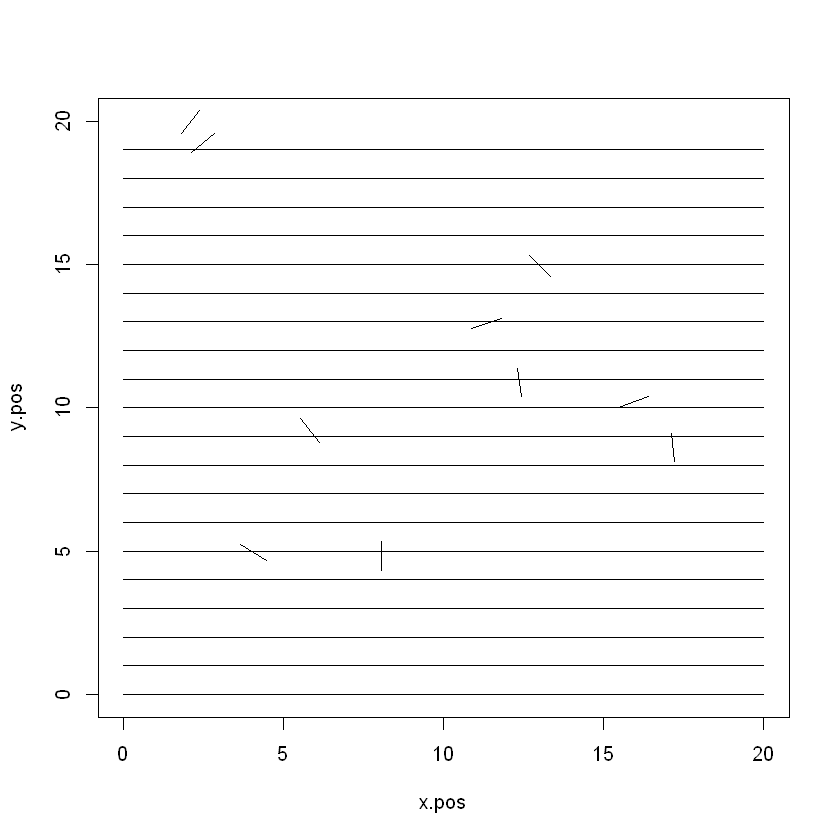

[1] "Muestra de 75 agujas con una probabilidad: 0.613333333333333"


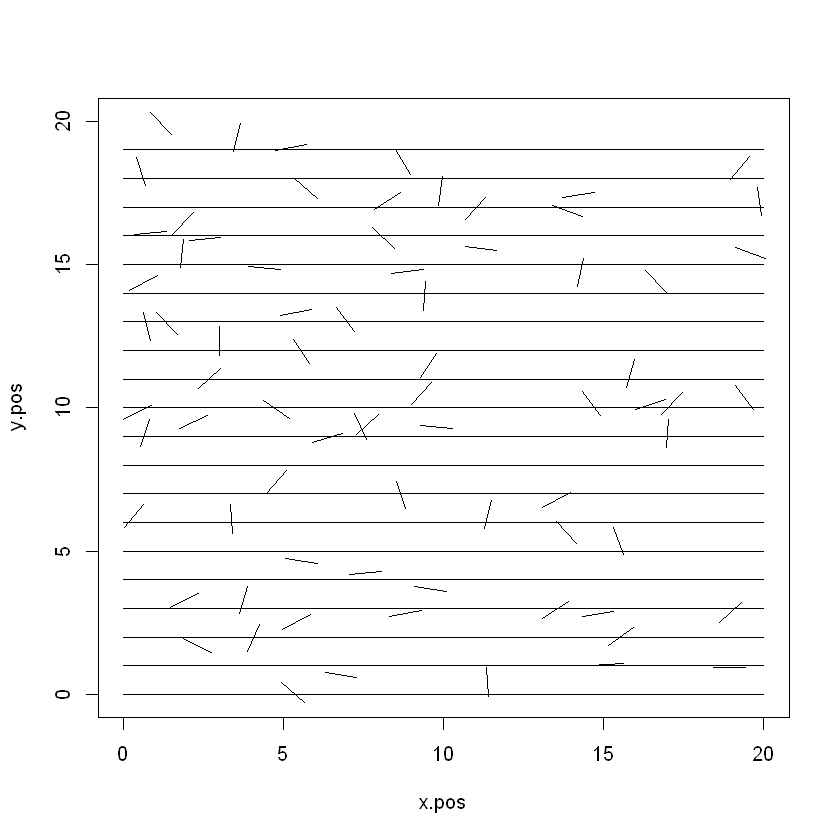

In [59]:
agujas(10)
agujas(75)

[1] "Muestra de 100 agujas con una probabilidad: 0.72"


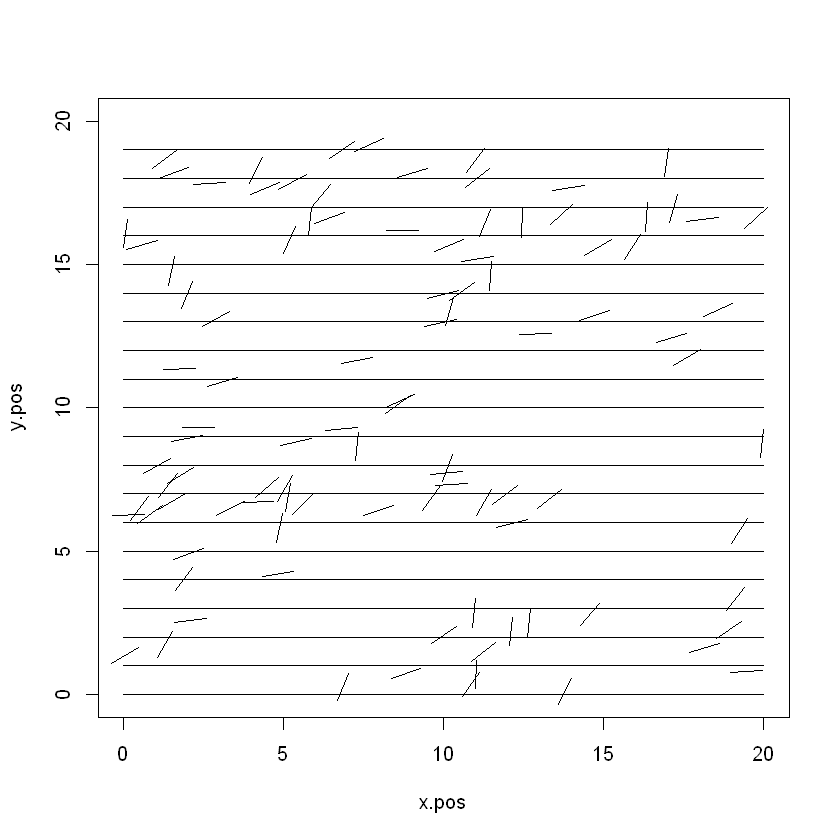

[1] "Muestra de 500 agujas con una probabilidad: 0.608"


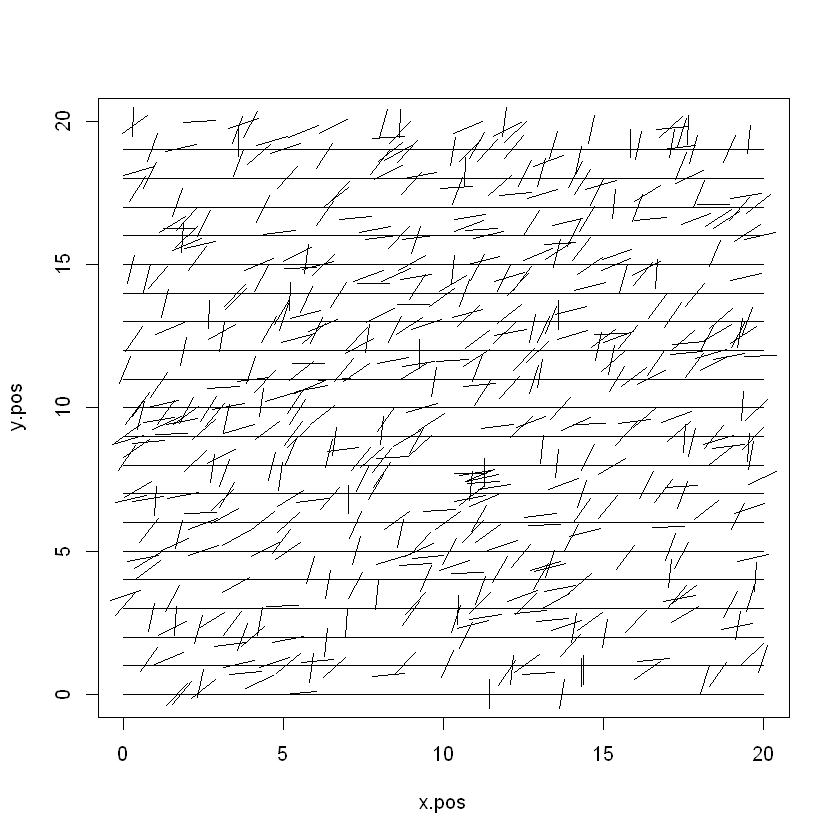

In [52]:
agujas(100)
agujas(500)

[1] "Muestra de 1000 agujas con una probabilidad: 0.627"


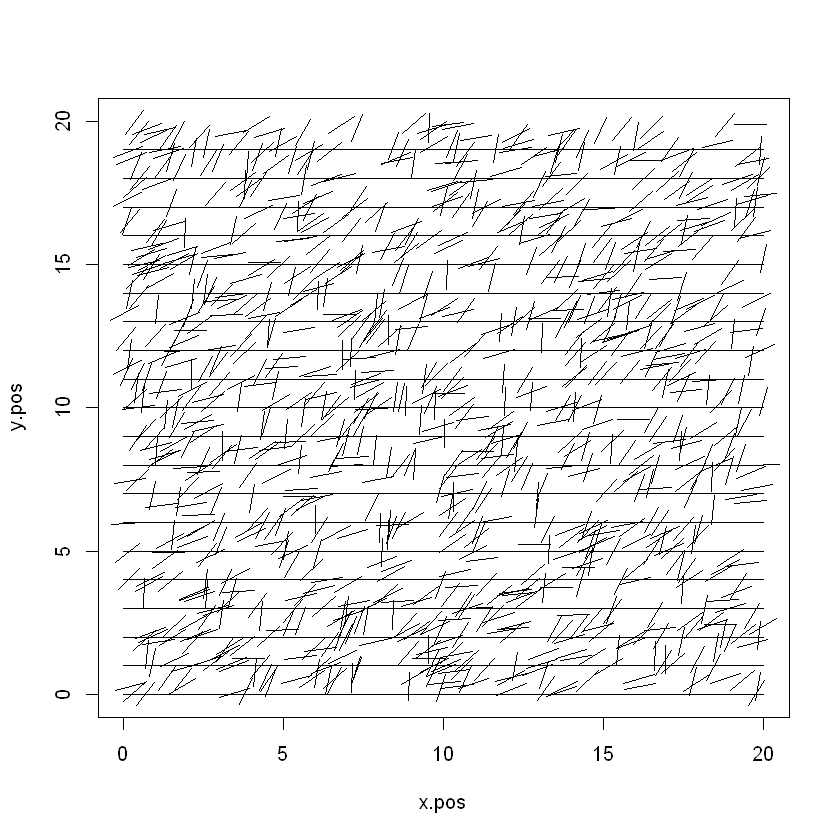

[1] "Muestra de 2000 agujas con una probabilidad: 0.6125"


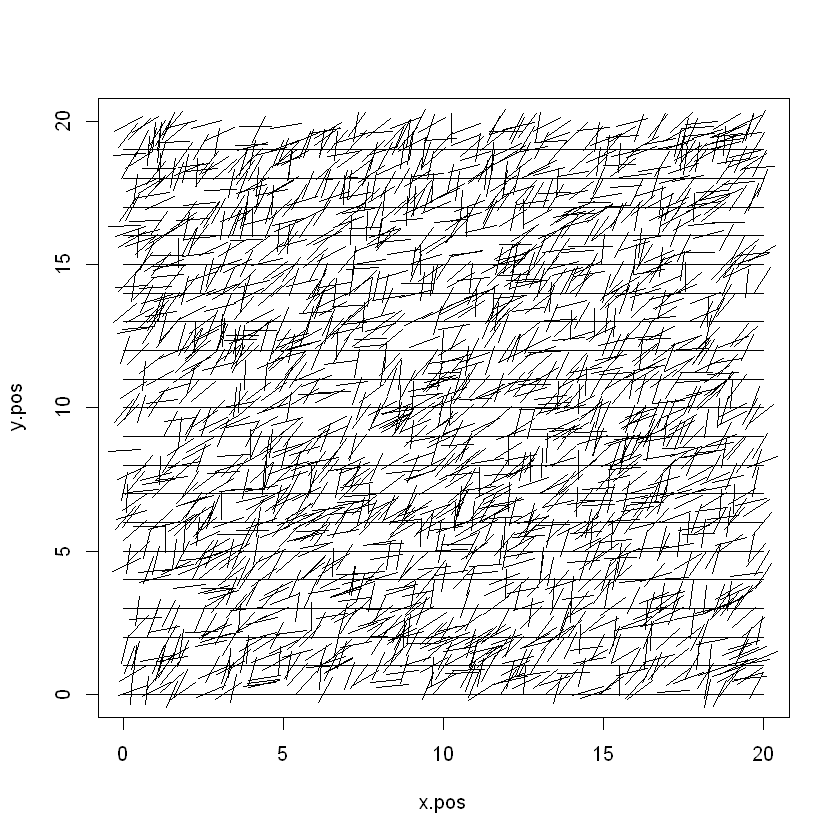

In [53]:
agujas(1000)
agujas(2000)

[1] "Muestra de 10000 agujas con una probabilidad: 0.6204"


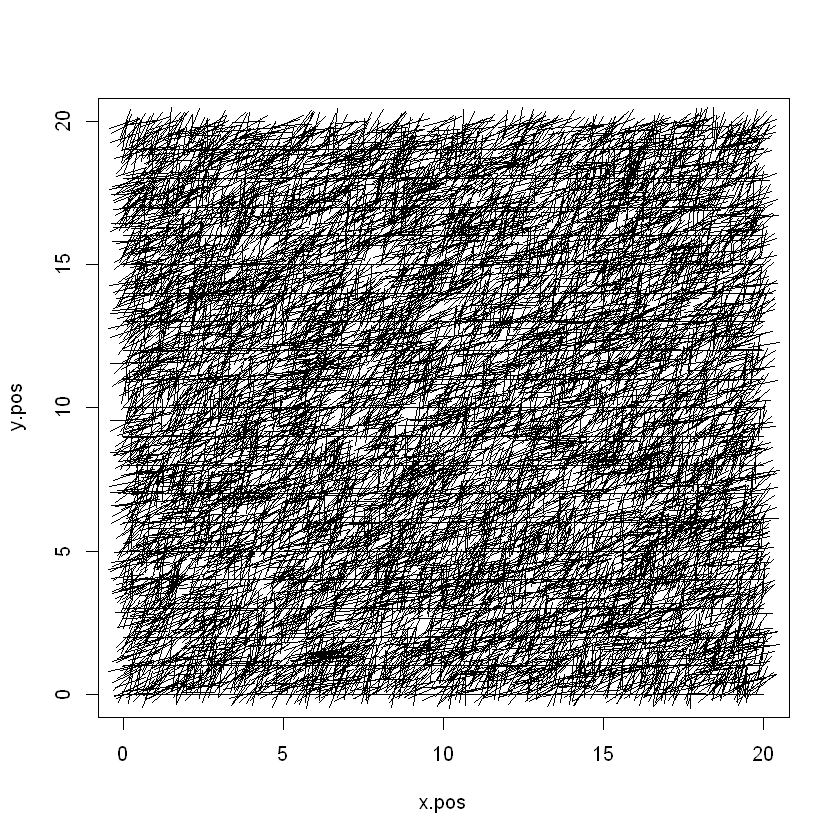

[1] "Muestra de 1e+05 agujas con una probabilidad: 0.62167"


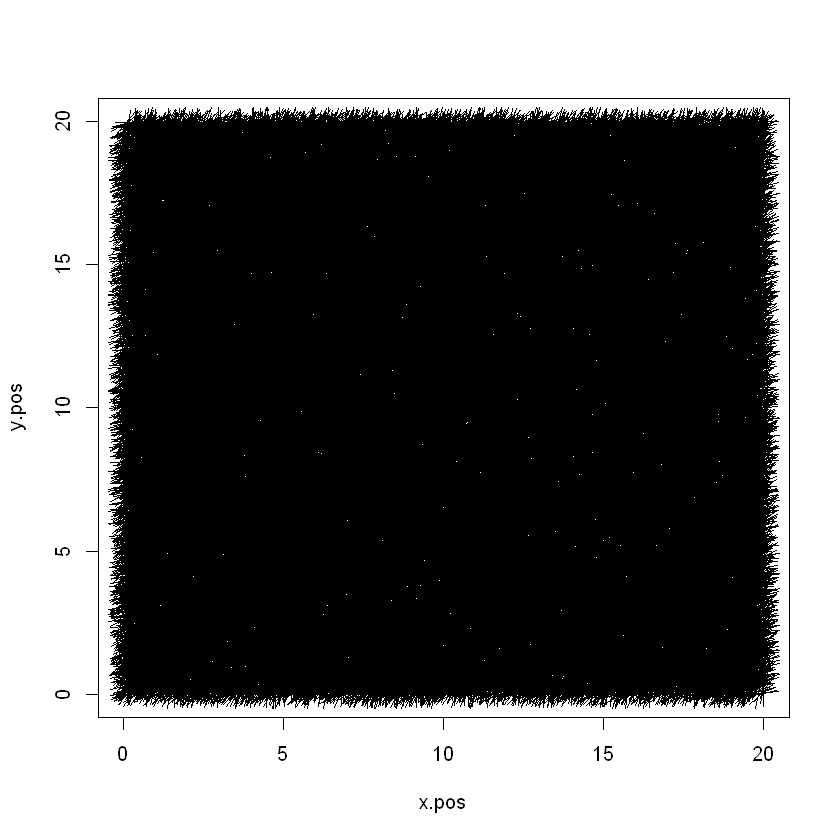

In [54]:
agujas(10000)
agujas(100000)

### 2.2 Cadenas de Markov (40p)

Las cadenas de markov son un modelo estocástico para describir una secuencia de sucesos donde la probabilidad de ir a un estado siguiente depende solamente del estado actual, esto se puede modelar de la siguiente forma:

$$ S_{n+1} = S_{n}\cdot P$$

Donde $P$ se conoce como matriz de transición y $S_{i}$ las matrices de estado ($S_{0}$ es conocida). Una cadena de markov se dice regular si su matriz de transición es regular, esto quiere decir que alguna potencia de $P$ tiene todas sus entradas positivas (para este caso 0 no es positivo).

Si se tiene una cadena de markov regular, en algún momento de la secuencia se encontrará una matriz de estado tal que:

$$ S_{f} \cdot P = S_{f}$$ 

A esta matriz $S_{f}$ se le conoce como matriz estacionaria.

Si desea profundizar más:
- [MC 1](https://www.youtube.com/watch?v=uvYTGEZQTEs)
- [MC 2](https://www.youtube.com/watch?v=jtHBfLtMq4U)
- [MC 3](https://www.youtube.com/watch?v=P8DuuiINAo4&t)
- [MC 4](https://www.youtube.com/watch?v=31X-M4okAI0)
- [MC 5](https://www.youtube.com/watch?v=-kwnnNSGFMc)


**Enunciado**

Tres compañías de comida rápida están compitiendo por el primer lugar en la supremacía de comida rápida. 

* Si un cliente originalmente es fiel a "Sansafood" tiene un $65\%$ de probabilidad de quedarse fiel a esta, un $20\%$ de cambiarse a "LDS ltda" y un $15\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "LDS ltda" tiene un $40\%$ de probabilidad de quedarse fiel a esta, un $30\%$ de cambiarse a "Sansafood" y un $30\%$ de cambiarse a "Wenzi's".

* Si un cliente originalmente es fiel a "Wenzi's" tiene un $70\%$ de probabilidad de quedarse fiel a esta, un $10\%$ de cambiarse a "Sansafood" y un $20\%$ de cambiarse a "LDS ltda".

En un comienzo 200 clientes pertenecen a "Sansafood", 180 a "LDS ltda" y 20 a "Wenzi's".

>a) Identifique la matriz de transición y la matriz de estado inicial

>**O:** b) Haga un diagrama de transición 

>**O:** c) ¿Este problema es un caso de una cadena de markov regular? ¿Por qué?

>d) ¿Existirá la matriz estacionaria en este caso? Si su respuesta es sí, obténgala.

>e) Después de pasado mucho tiempo. ¿Quién tendrá una mayor cantidad de clientes? Asuma que la matriz de transición será válida por todo este periodo arbitrario de tiempo y no llegarán ni saldrán más clientes del mundo de comida rápida. **No realice esta simulación como una multiplicación de matrices**, use las probabilidades y las cantidades dadas. Compare con d) 

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Dudas solamente hasta el  día 31 de Marzo a las 23hrs.
+ Dudas **principalmente** vía moodle, evite otro tipo de medio ya que su duda podría ser la de otro.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.5.2
+ La versión de Python que se usará para revisar es 3.6.8
+ Los alumnos malla nueva que decidan responder las preguntas opcionales (obviando algún bonus para todos) tendrán 1 punto bonus por pregunta correctamente respondida, con un máximo de nota 100.
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, explique su procedimiento y luego responda. 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)